In [1]:
import pandas as pd
import numpy as np


# Reading the csv files 

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
movies.shape

(4803, 20)

In [4]:
credits.shape


(4803, 4)

In [5]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [6]:
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [7]:
movies.head(1)['genres'].values

array(['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'],
      dtype=object)

In [8]:
movies.head(1)['keywords'].values

array(['[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'],
      dtype=object)

In [9]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


# Merging the two datasets based on the title

In [10]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [11]:
movies  = movies.merge(credits,on='title')

In [12]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [13]:
# There are 23 total columns and we need to do the feature selection based upon our project
# so the columns which we going to include to make movie recommendation system

# genres,id,keywods,title,overview,cast,crew
# id used to take the poster of the movie,crew for the director
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4809 non-null   int64 
 1   title     4809 non-null   object
 2   overview  4806 non-null   object
 3   genres    4809 non-null   object
 4   keywords  4809 non-null   object
 5   cast      4809 non-null   object
 6   crew      4809 non-null   object
dtypes: int64(1), object(6)
memory usage: 300.6+ KB


In [15]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [16]:
movies.dropna(inplace = True)

In [17]:
movies.duplicated().sum()

0

In [18]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [19]:
# Converting string into list
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [20]:
movies.columns

Index(['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew'], dtype='object')

In [21]:
# Extracting the genres out of the genres dictionary
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [22]:
movies['genres'] = movies['genres'].apply(convert)

In [23]:
movies['genres']

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4804                        [Action, Crime, Thriller]
4805                                [Comedy, Romance]
4806               [Comedy, Drama, Romance, TV Movie]
4807                                               []
4808                                    [Documentary]
Name: genres, Length: 4806, dtype: object

In [24]:
## Solving the problem of keywords
movies.iloc[0]['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [25]:
movies['keywords'] = movies['keywords'].apply(convert)

In [26]:
movies.columns

Index(['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew'], dtype='object')

In [27]:
movies['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [28]:
# Used to extract the three top cast memebers of each film
def convert_cast(obj):
    L = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 3:
            L.append(i['name'])
            counter += 1
        else:
            break
    return L

In [29]:
movies['cast'] = movies['cast'].apply(convert_cast)

In [30]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [31]:
def fetch_director(obj):
    L = []
    for i in ast.literal_eval(obj):
            if i["job"] == "Director":
                L.append(i['name'])
                break
                
            
    return L

In [32]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [33]:
movies

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]
...,...,...,...,...,...,...,...
4804,9367,El Mariachi,El Mariachi just wants to play his guitar and ...,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",[Robert Rodriguez]
4805,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...,"[Comedy, Romance]",[],"[Edward Burns, Kerry Bishé, Marsha Dietlein]",[Edward Burns]
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...","[Eric Mabius, Kristin Booth, Crystal Lowe]",[Scott Smith]
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],[],"[Daniel Henney, Eliza Coupe, Bill Paxton]",[Daniel Hsia]


In [34]:
movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [35]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [36]:
movies


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]
...,...,...,...,...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui...","[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",[Robert Rodriguez]
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended...","[Comedy, Romance]",[],"[Edward Burns, Kerry Bishé, Marsha Dietlein]",[Edward Burns]
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,...","[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...","[Eric Mabius, Kristin Booth, Crystal Lowe]",[Scott Smith]
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is...",[],[],"[Daniel Henney, Eliza Coupe, Bill Paxton]",[Daniel Hsia]


# Data Transformation

In [37]:
# Need to convert Sam Worthington to SamWorthington

In [38]:
i  = "Krishna Gupta"
a = i.replace(" ","")
print(a)

KrishnaGupta


In [39]:
movies['genres'] = movies['genres'].apply(lambda x: [i.replace(" ","") for i in x])

In [40]:
movies['keywords'] = movies['keywords'].apply(lambda x: [i.replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(lambda x: [i.replace(" ","") for i in x])
movies['crew'] = movies['crew'].apply(lambda x: [i.replace(" ","") for i in x])

In [41]:
movies.columns

Index(['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew'], dtype='object')

In [42]:
movies['tags'] = movies['overview'] + movies['genres'] +movies['keywords'] + movies['cast'] + movies['crew'] 

In [43]:
new_df  = movies.drop(columns= ['overview', 'genres', 'keywords', 'cast', 'crew'],axis = 1)

In [44]:
new_df.columns

Index(['movie_id', 'title', 'tags'], dtype='object')

In [45]:
new_df['tags'] = new_df['tags'].apply(lambda x : " ".join(x))

In [46]:
new_df['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [47]:
new_df['tags'] = new_df['tags'].apply(lambda x: x.lower() )

In [48]:
new_df

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."
...,...,...,...
4804,9367,El Mariachi,el mariachi just wants to play his guitar and ...
4805,72766,Newlyweds,a newlywed couple's honeymoon is upended by th...
4806,231617,"Signed, Sealed, Delivered","""signed, sealed, delivered"" introduces a dedic..."
4807,126186,Shanghai Calling,when ambitious new york attorney sam is sent t...


In [49]:
#NLTK, or Natural Language Toolkit, is a Python package that you can use for NLP. 
import nltk

In [50]:
# Stemming Processs
# Stemming is a technique used to reduce an inflected word down to its word stem.
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('danced')

'danc'

In [51]:
new_df['tags'][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [52]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    
    return " ".join(y)

In [53]:
new_df['tags'] = new_df['tags'].apply(stem)

In [54]:
new_df['tags'][0]

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
cv  = CountVectorizer(max_features=5000 , stop_words= 'english')
# max_features is the length of vectors and the stop words like if,are,a,in will not be considered

In [56]:
#cv.get_feature_names()

In [57]:
vectors = cv.fit_transform(new_df['tags']).toarray()

In [58]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [59]:
vectors.shape

(4806, 5000)

In [60]:
# Each vector will be of 5000 dimensions
len(vectors[0])

5000

In [61]:
# cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity =  cosine_similarity(vectors)


In [62]:
similarity

array([[1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
        0.        ],
       [0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
        0.02615329],
       [0.0860309 , 0.06063391, 1.        , ..., 0.02451452, 0.        ,
        0.        ],
       ...,
       [0.04499213, 0.02378257, 0.02451452, ..., 1.        , 0.03962144,
        0.04229549],
       [0.        , 0.        , 0.        , ..., 0.03962144, 1.        ,
        0.08714204],
       [0.        , 0.02615329, 0.        , ..., 0.04229549, 0.08714204,
        1.        ]])

In [63]:
similarity.shape

(4806, 4806)

In [64]:
print(type(similarity))

<class 'numpy.ndarray'>


In [65]:
similarity[0]

array([1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
       0.        ])

In [66]:
sorted(list(enumerate(similarity[0])),reverse= True, key = lambda x:x[1])[1:6]

[(1216, 0.28676966733820225),
 (2409, 0.26901379342448517),
 (3730, 0.2605130246476754),
 (507, 0.255608593705383),
 (539, 0.25038669783359574)]

In [67]:
movie_index = new_df[new_df['title'] == 'Avatar'].index[0]
print(movie_index)

0


In [68]:
list(enumerate(similarity[0]))

[(0, 1.0000000000000002),
 (1, 0.08346223261119858),
 (2, 0.08603090020146065),
 (3, 0.0734718358370645),
 (4, 0.1892994097121204),
 (5, 0.10838874619051501),
 (6, 0.04024218182927669),
 (7, 0.14673479641335554),
 (8, 0.05923488777590923),
 (9, 0.0967301666813349),
 (10, 0.10259783520851541),
 (11, 0.09464970485606021),
 (12, 0.09037128496931669),
 (13, 0.04499212706658476),
 (14, 0.12824729401064427),
 (15, 0.06282808624375433),
 (16, 0.07894736842105264),
 (17, 0.13977653617040256),
 (18, 0.09493290614465533),
 (19, 0.0830812984794528),
 (20, 0.058038100008800934),
 (21, 0.10968169942141635),
 (22, 0.0662266178532522),
 (23, 0.08740748201220976),
 (24, 0.0533380747062665),
 (25, 0.05101627678885769),
 (26, 0.15389675281277312),
 (27, 0.18693292157876878),
 (28, 0.116543309349613),
 (29, 0.065033247714309),
 (30, 0.06684847767323797),
 (31, 0.15907119074394446),
 (32, 0.08520286456846099),
 (33, 0.09733285267845754),
 (34, 0.0),
 (35, 0.09933992677987831),
 (36, 0.17316974359835272),


In [69]:
new_df

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."
...,...,...,...
4804,9367,El Mariachi,el mariachi just want to play hi guitar and ca...
4805,72766,Newlyweds,a newlyw couple' honeymoon is upend by the arr...
4806,231617,"Signed, Sealed, Delivered","""signed, sealed, delivered"" introduc a dedic q..."
4807,126186,Shanghai Calling,when ambiti new york attorney sam is sent to s...


In [70]:
new_df[new_df['title'] == 'Avatar'].index[0]

0

In [71]:
def recommend(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distances  = similarity[movie_index]
    movie_list = sorted(list(enumerate(distances)),reverse= True, key = lambda x:x[1])[1:6]
    for i in movie_list:
        print(new_df.iloc[i[0]].title)

In [72]:
recommend("Batman Begins")

The Dark Knight
Batman
Batman
The Dark Knight Rises
10th & Wolf


In [73]:
import pickle

In [74]:
pickle.dump(new_df.to_dict(),open('movie_dict.pkl','wb'))

In [75]:
pickle.dump(similarity,open('similarity.pkl','wb'))

# Implementing the KMeans Algorithm

In [92]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 27,init = 'random',random_state = 0 ) #other initialization method is kmean
y_km = km.fit_predict(vectors)  #No target passed hence it is unsupervised number


In [77]:
pd.Series(y_km).unique()

array([7, 3, 9, 1, 4, 0, 2, 5, 8, 6])

# Implementing the elbow method

In [81]:
# distortion = []
# from sklearn.cluster import KMeans

# for i in range(1,31):
#     print(i)
#     km = KMeans(n_clusters = i,init = 'k-means++',random_state = 0)
#     km.fit(vectors)
#     distortion.append(km.inertia_)
# plt.plot(range(1,31),distortion,marker = 'o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Distortion')
# plt.title('Elbow method for vlue of K')


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


NameError: name 'plt' is not defined

In [88]:
pd.DataFrame(distortion).to_csv('elbow.csv',index=False)

In [89]:
pd.read_csv('elbow.csv')

,0
0,187662.576363
1,182110.452369
2,180649.405413
3,179581.053310
4,178612.369727
5,179424.351445
6,177674.833091
7,177532.370732
8,177137.183389
9,177216.410786


Text(0.5, 1.0, 'Elbow method for vlue of K')

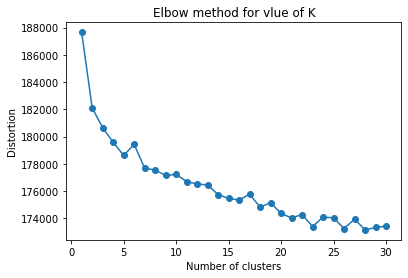

In [91]:
import matplotlib.pyplot as plt
plt.plot(range(1,31),distortion,marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow method for vlue of K')

# Implementing the Agglomerative Clustering Algorithm

In [94]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters = 2,affinity='euclidean',linkage = 'single')
y_ag  = ag.fit_predict(vectors)


# Implementing the DBSCAN Algorithm

In [96]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.2,min_samples = 5,metric = 'euclidean')
y_db = db.fit_predict(vectors)

